In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TadiranvsSaft_3-28-24_DailyAVG.csv')

In [4]:
df

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status
0,3/3/2024,401728,1.86,1856,Tadiran,Warning
1,1/7/2024,401428,1.92,1920,Tadiran,Warning
2,2/25/2024,401728,1.94,1936,Tadiran,Warning
3,3/23/2024,400908,1.94,1936,Tadiran,Warning
4,3/28/2024,400868,1.94,1936,Tadiran,Warning
...,...,...,...,...,...,...
440371,1/11/2024,400777,3.55,3552,Tadiran,Irregular
440372,2/22/2024,400773,3.55,3552,Tadiran,Irregular
440373,1/13/2024,400914,3.55,3552,Tadiran,Irregular
440374,3/2/2024,401230,3.57,3568,Tadiran,Irregular


In [ ]:
'''
2.2 Volts should be considered unhealthy.

>3.5 - irregular reading
3.49 - 3.0 Volts (Excellent)
2.9 9- 2.5 Volts (Good)
2.49 - 2.21 (Moderate)
<2.2 (Warning)

'''

In [4]:
df['Battery'].unique()

array(['Tadiran', 'Saft'], dtype=object)

In [5]:
tadiran = df[df['Battery'] == 'Tadiran']
saft = df[df['Battery'] == 'Saft']

### Time Spent in "Warning"

In [16]:
# tadiran
t_no_warnings = []
t_pct_warn = []
for bolus in tadiran['BolusId'].unique()[0:5]:
    tmp = tadiran[tadiran['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'] == 'Warning'].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.08549469484765966
number of bolus with no warning: 0


In [17]:
# SAFT
t_no_warnings = []
t_pct_warn = []
for bolus in saft['BolusId'].unique()[0:5]:
    tmp = saft[saft['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'] == 'Warning'].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.002494208494208494
number of bolus with no warning: 3


In [6]:
df['ds'] = pd.to_datetime(df['ReadDateTime'])

In [38]:
df[df['BolusId']==400892]['ds'].min()

Timestamp('2023-08-26 00:00:00')

In [30]:
# non fails
401728 : 2023-08-30 - 2024-03-27
400868 : 2023-08-30- 2024-03-28
400773 : 2023-08-30  - 2024-03-28
401385 : 2023-08-31 - 2024-03-28


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3437962419.py, line 1)

In [7]:
fails = pd.read_csv("Failed_units_Forest_view.csv")
fails.head()

,BolusId
0,400195
1,400892
2,400250
3,400029
4,400256


In [8]:
for id in fails.BolusId:
    tmp = df[df['BolusId']==id]
    min_ = tmp['ds'].min()
    max_ = tmp['ds'].max()
    print(f'{id}:  {min_} - {max_}')

400195:  NaT - NaT
400892:  2023-08-26 00:00:00 - 2024-02-25 00:00:00
400250:  2023-08-29 00:00:00 - 2024-03-10 00:00:00
400029:  2023-08-29 00:00:00 - 2024-01-18 00:00:00
400256:  2023-08-30 00:00:00 - 2024-02-24 00:00:00
400660:  2023-08-30 00:00:00 - 2024-03-27 00:00:00
401710:  2023-08-30 00:00:00 - 2024-03-28 00:00:00
400166:  2023-08-30 00:00:00 - 2024-03-02 00:00:00
400734:  2023-08-30 00:00:00 - 2023-12-14 00:00:00
400976:  2023-08-30 00:00:00 - 2024-03-14 00:00:00
401866:  2023-08-30 00:00:00 - 2024-03-14 00:00:00
401738:  2023-08-30 00:00:00 - 2024-03-19 00:00:00
400808:  2023-08-30 00:00:00 - 2024-03-26 00:00:00
400802:  2023-08-30 00:00:00 - 2024-03-28 00:00:00


In [9]:

df.isna().sum()

ReadDateTime    0
BolusId         0
Voltage         0
BattRaw         0
Battery         0
Status          0
ds              0
dtype: int64

In [10]:
df[df['Voltage']==0]

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds


what does fail mean?

In [16]:
df.loc[df['BolusId'].isin(fails['BolusId'].unique()), "failed"] = 1

In [18]:
df.loc[~df['BolusId'].isin(fails['BolusId'].unique()), "failed"] = 0

In [20]:
non_fails = df[df['failed'] == 0]
fails = df[df["failed"] == 1]

In [21]:
# number of reads of non fails
lengths = []
for id in non_fails['BolusId'].unique():
    tmp = non_fails[non_fails['BolusId'] == id]
    lengths.append(len(tmp['ds']))


(array([  77.,   59.,   87.,   93., 1034.,    5.,    4.,   14.,   37.,
         412.]),
 array([  1. ,  43.7,  86.4, 129.1, 171.8, 214.5, 257.2, 299.9, 342.6,
        385.3, 428. ]),
 <BarContainer object of 10 artists>)

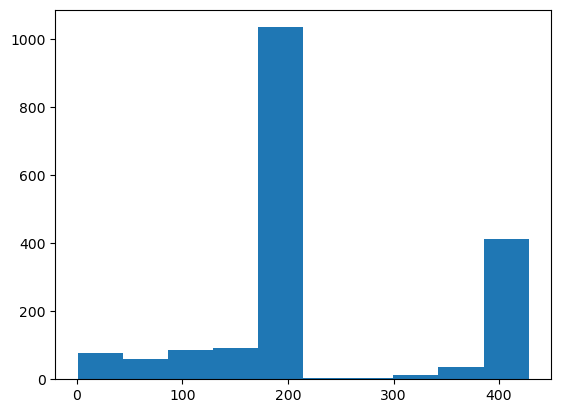

In [23]:
plt.hist(lengths)

In [24]:
# number of reads of non fails
lengths = []
for id in fails['BolusId'].unique():
    tmp = fails[fails['BolusId'] == id]
    lengths.append(len(tmp['ds']))

(array([1., 1., 3., 4., 0., 0., 1., 0., 1., 2.]),
 array([107. , 135.3, 163.6, 191.9, 220.2, 248.5, 276.8, 305.1, 333.4,
        361.7, 390. ]),
 <BarContainer object of 10 artists>)

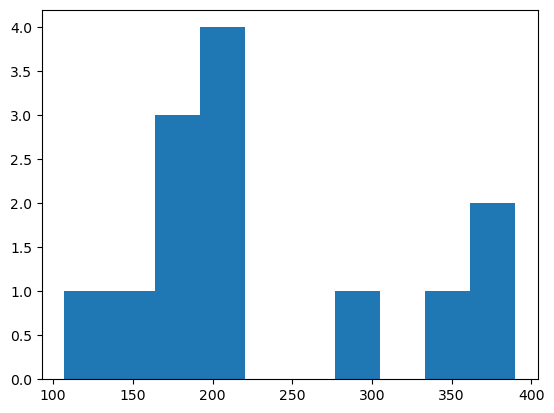

In [25]:
plt.hist(lengths)

In [ ]:
## 